<a href="https://colab.research.google.com/github/reygaferdiansyah/CNN/blob/main/Satwa_Burung_langka_Papua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import random
from scipy import ndarray
from random import randrange
import skimage as sk
from skimage import transform
from skimage import img_as_ubyte
from skimage import util
from skimage import io

In [ ]:
def random_rotation(image_array: ndarray):
  random_degree = random.uniform(-25, 25)
  return sk.transform.rotate(image_array, random_degree)

In [ ]:
def random_noise(image_array: ndarray):
  return sk.util.random_noise(image_array)

In [ ]:
def horizontal_flip(image_array: ndarray):
  return image_array[:, ::-1]

In [ ]:
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/Satwa_burung_langka_papua/dataset/train/cenderawasih'
num_files_desired = 150

In [ ]:
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

NameError: ignored

In [ ]:
num_generated_files = 0
while num_generated_files <= num_files_desired:
  image_path = random.choice(images)
  image_to_transform = sk.io.imread(image_path)
  num_transformations_to_apply = random.randint(1, len(available_transformations))
  num_transformations = 0
  transformed_image = None

  while num_transformations <= num_transformations_to_apply:
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image_to_transform)
    num_transformations += 1

    new_file_path = '%s/augmented_image_%s.jpg' %(folder_path, num_generated_files)

    io.imsave(new_file_path, img_as_ubyte(transformed_image))
    num_generated_files += 1

NameError: ignored

In [ ]:
# membuat label citra yang akan di klasifikasi
class_names = ['cenderawasih', 'kakatua raja', 'nuri kabare', 'kasuari gelambir ganda']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)

In [ ]:
# membuat fungsi load_data untuk memuat data citra dan data label dari folder dataset
def load_data():
    datasets = ['/content/drive/MyDrive/Satwa_burung_langka_papua/dataset/train',
                '/content/drive/MyDrive/Satwa_burung_langka_papua/dataset/test']
    output = []
    # perulangan melalui training dan tes citra
    for dataset in datasets:
        images = []
        labels = []
        print("Memuat {}".format(dataset))
        #  perulangan setiap folder untuk mendapatkan kategori
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            # perulangan setiap citra yang ada di folder dataset
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # mendapatkan nama-nama citra
                img_path = os.path.join(os.path.join(dataset, folder), file)
                # membuka dan merubah ukuran citra
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                # menambahkan citra dan label sesuai output
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images, labels))
    return output
# menampilkan proses memuat citra dari dataset
(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, train_labels = shuffle(train_images, train_labels, random_state=10)

Memuat /content/drive/MyDrive/Satwa_burung_langka_papua/dataset/train


100%|██████████| 156/156 [00:00<00:00, 239.77it/s]


Memuat /content/drive/MyDrive/Satwa_burung_langka_papua/dataset/test


100%|██████████| 159/159 [00:00<00:00, 197.43it/s]


In [ ]:
n_train = train_labels.shape[0] # menghitung jumlah citra train
n_test = test_labels.shape[0] # menghitung jumlah citra test

print ("Jumlah citra training : {}".format(n_train))
print ("Jumlah citra testing : {}".format(n_test))
print ("Ukuran citra : {}".format(IMAGE_SIZE))

Jumlah citra training : 628
Jumlah citra testing : 633
Ukuran citra : (150, 150)


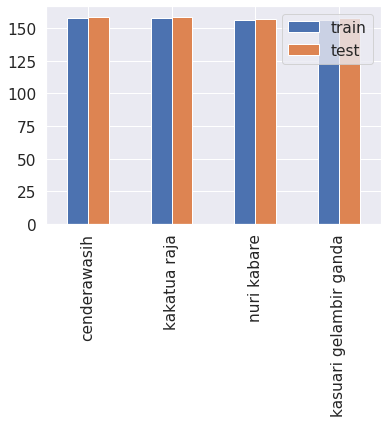

In [ ]:
# membuat diagram batang
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts, 'test': test_counts},
             index=class_names
            ).plot.bar()
plt.savefig('/content/drive/MyDrive/Satwa_burung_langka_papua/asset/plot_dataset.png')
plt.show()

In [ ]:
# melakukan scale citra
train_images = train_images / 255.0
test_images = test_images / 255.0

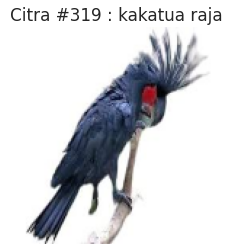

In [ ]:
# menampilkan satu citra acak dari data training
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Citra #{} : '.format(index) + class_names[labels[index]])
    plt.show()
display_random_image(class_names, train_images, train_labels)

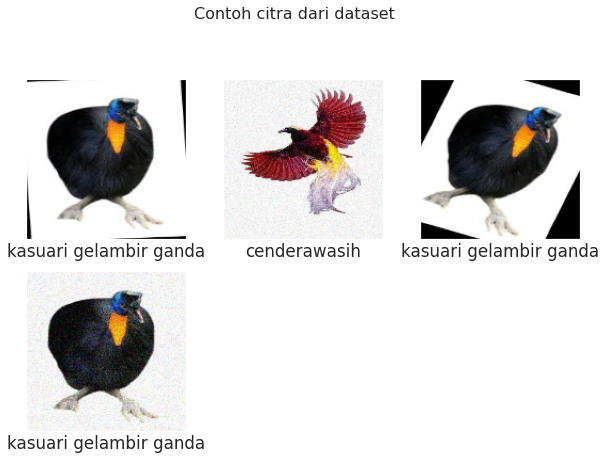

In [ ]:
# menampilkan 4 citra dari data training
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Contoh citra dari dataset", fontsize=16)
    for i in range(4):
        plt.subplot(3,3,i+1)
        #plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)

In [ ]:
%%time

import time
from time import time
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

#Training model Sequensial
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',
                           input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

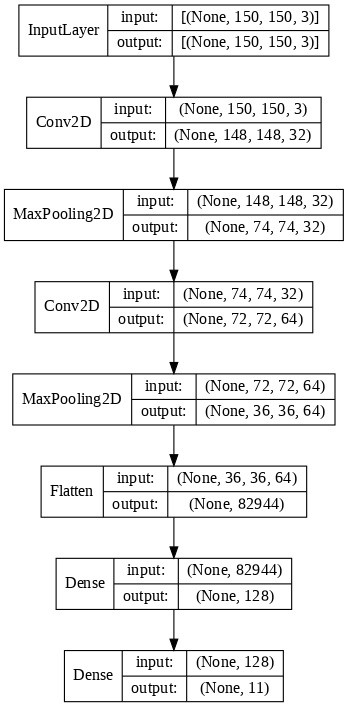

In [ ]:
plot_model(model, to_file='/content/drive/MyDrive/Satwa_burung_langka_papua/asset/model_Sequential.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
4/4 [==============================] - 6s 655ms/step - loss: 7.4484 - accuracy: 0.1713 - val_loss: 10.1099 - val_accuracy: 0.2619
Epoch 2/30
4/4 [==============================] - 0s 80ms/step - loss: 4.8384 - accuracy: 0.2669 - val_loss: 1.1833 - val_accuracy: 0.2460
Epoch 3/30
4/4 [==============================] - 0s 85ms/step - loss: 1.0454 - accuracy: 0.5299 - val_loss: 0.7685 - val_accuracy: 0.9444
Epoch 4/30
4/4 [==============================] - 0s 82ms/step - loss: 0.6117 - accuracy: 0.9323 - val_loss: 0.5123 - val_accuracy: 0.9365
Epoch 5/30
4/4 [==============================] - 0s 83ms/step - loss: 0.3035 - accuracy: 0.9841 - val_loss: 0.1925 - val_accuracy: 0.9921
Epoch 6/30
4/4 [==============================] - 0s 83ms/step - loss: 0.1097 - accuracy: 0.9980 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 80ms/step - loss: 0.0349 - accuracy: 0.9980 - val_loss: 0.0232 - val_accuracy: 0.9921
Epoch 8/30
4/4 [=========

In [ ]:
# simpan model
filename = '/content/drive/MyDrive/Satwa_burung_langka_papua/model/model_Sequensial.h5'
model.save(filename)
#print('>Saved model to %s' % filename)

# simpan model report ke csv
model_csv = pd.DataFrame(history.history)
csv_file = '/content/drive/MyDrive/Satwa_burung_langka_papua/model/model_Sequensial.csv'
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)
#print('>Saved report to %s' % csv_file)

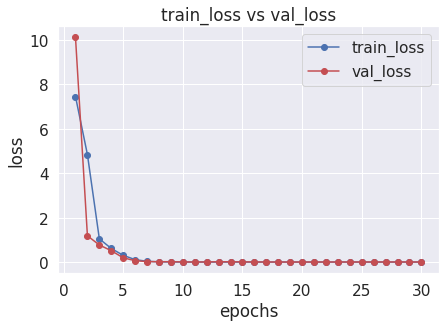

In [ ]:
def plot_accuracy_loss(history):
    plt.figure(figsize=(15,10))
    epochs = range(1, len(history.history['accuracy']) + 1)
    # Plot accuracy
    plt.subplot(221)
    plt.plot(epochs, history.history['accuracy'],'bo-', label = "train_acc")
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    # Plot loss function
    plt.subplot(222)
    plt.plot(epochs, history.history['loss'],'bo-', label = "train_loss")
    plt.plot(epochs, history.history['val_loss'], 'ro-', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.savefig('/content/drive/MyDrive/Satwa_burung_langka_papua/asset/plot_Sequential.png')
    plt.show()
plot_accuracy_loss(history)

In [ ]:
# Mengevaluasi kinerja model pada set pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy : {:.2f}%".format(test_acc*100))
print("Loss     : {:.3f}".format(test_loss))

20/20 [==============================] - 1s 15ms/step - loss: 0.0211 - accuracy: 0.9905
Accuracy : 99.05%
Loss     : 0.021


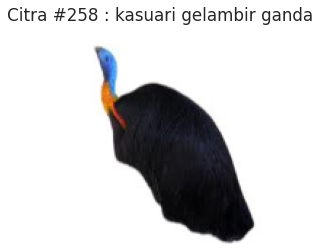

In [ ]:
predictions = model.predict(test_images)     # Vector probabilitas
pred_labels = np.argmax(predictions, axis = 1) # Mengambil probabilitas tertingi

display_random_image(class_names, test_images, pred_labels)